<a href="https://colab.research.google.com/github/shreyas1209/Sudoku_Solver_App/blob/main/Sudoku_Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
image = cv2.imread('/content/gdrive/MyDrive/Sudoku/sample_sudoku.jpg')
image1 = cv2.imread('/content/gdrive/MyDrive/Sudoku/sample_sudoku_1.jpg')
image2 = cv2.imread('/content/gdrive/MyDrive/Sudoku/sample_sudoku_3.jpg')


In [4]:
import sys

sys.path.append('/content/gdrive/MyDrive/Sudoku/Models')
sys.path.append('/content/gdrive/MyDrive/Sudoku')



In [5]:
from sudoku_net import *

In [6]:
model = sudokunet(output_classes=10)

In [7]:
device = torch.device("cuda")
model.load_state_dict(torch.load('/content/gdrive/MyDrive/Sudoku/sudoku_model_weights.pth', map_location="cuda:0")) 
model.to(device)

sudokunet(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1152, out_features=128, bias=True)
  (dropout1): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (output): Linear(in_features=64, out_features=10, bias=True)
)

In [8]:
from sudoku_detector import *

In [9]:
def image_preproccesor (img):
  pic = sudoku_detector(img)
  boundary = find_boundary(img,pic)
  crop = crop_and_warp(img,pic,boundary)

  return crop


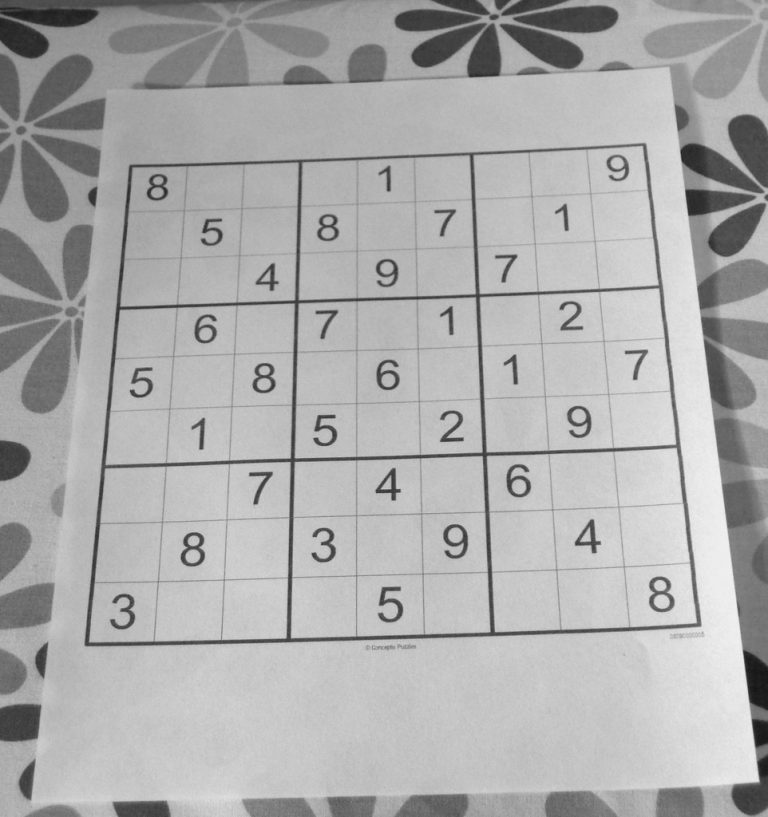

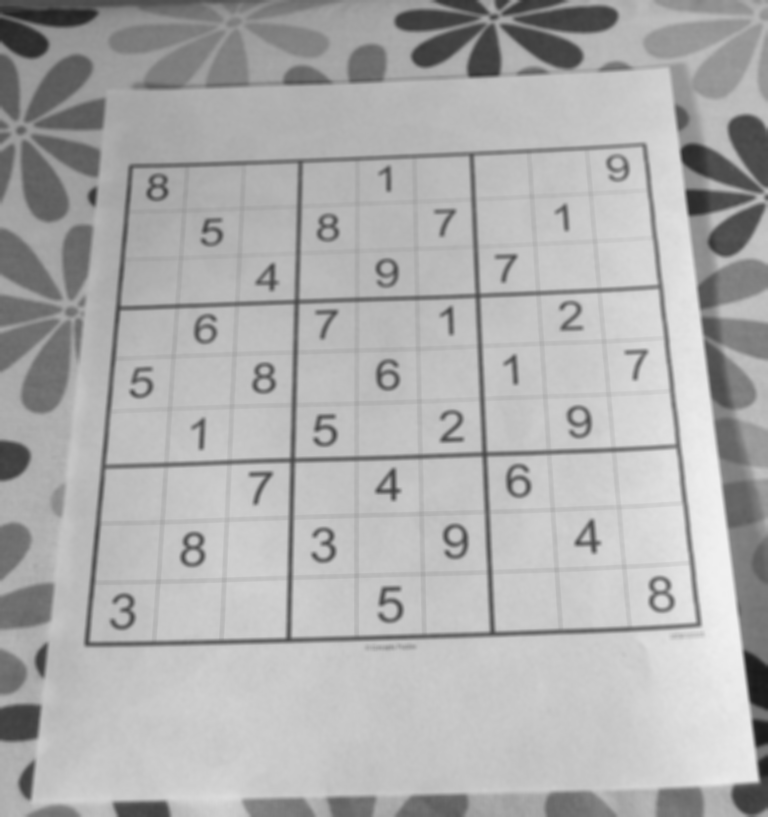

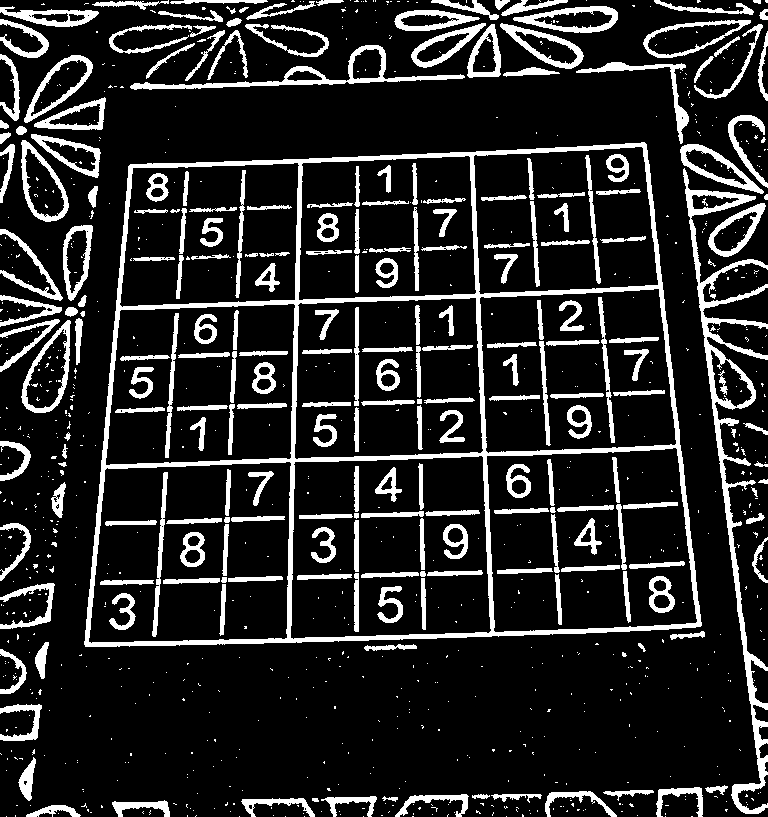

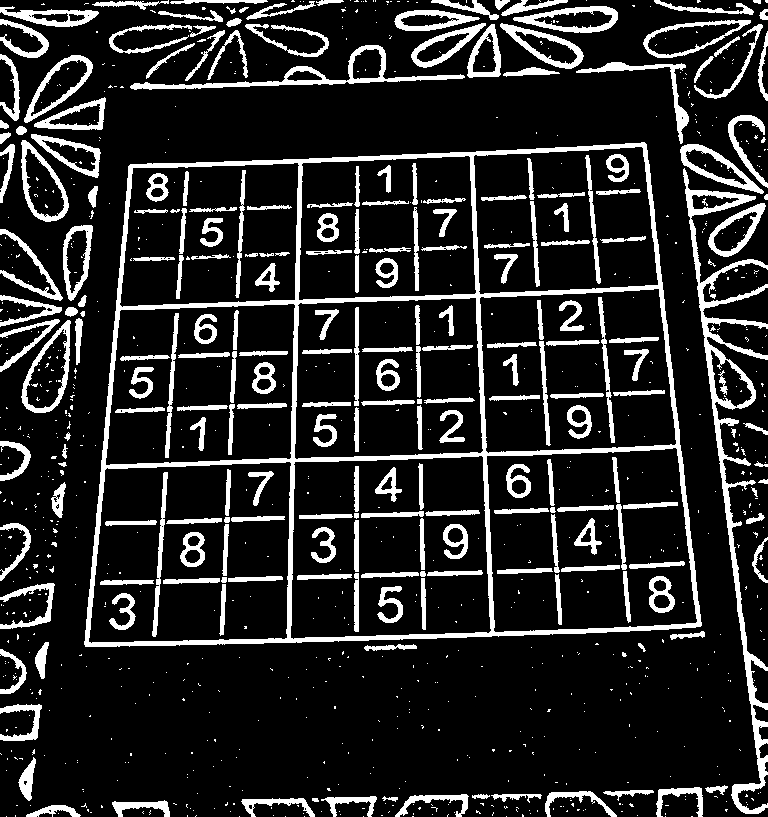

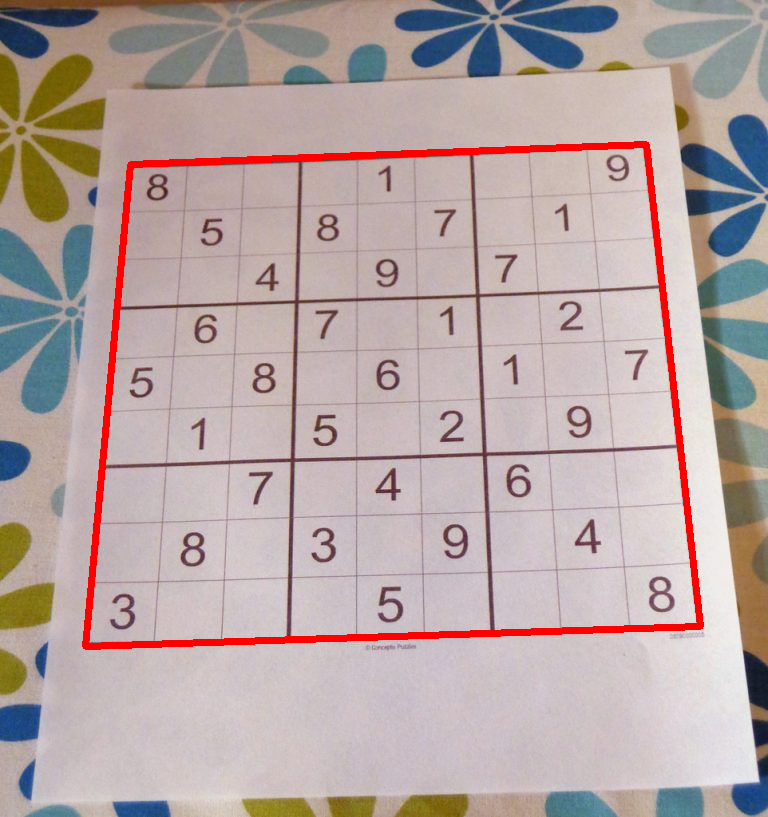

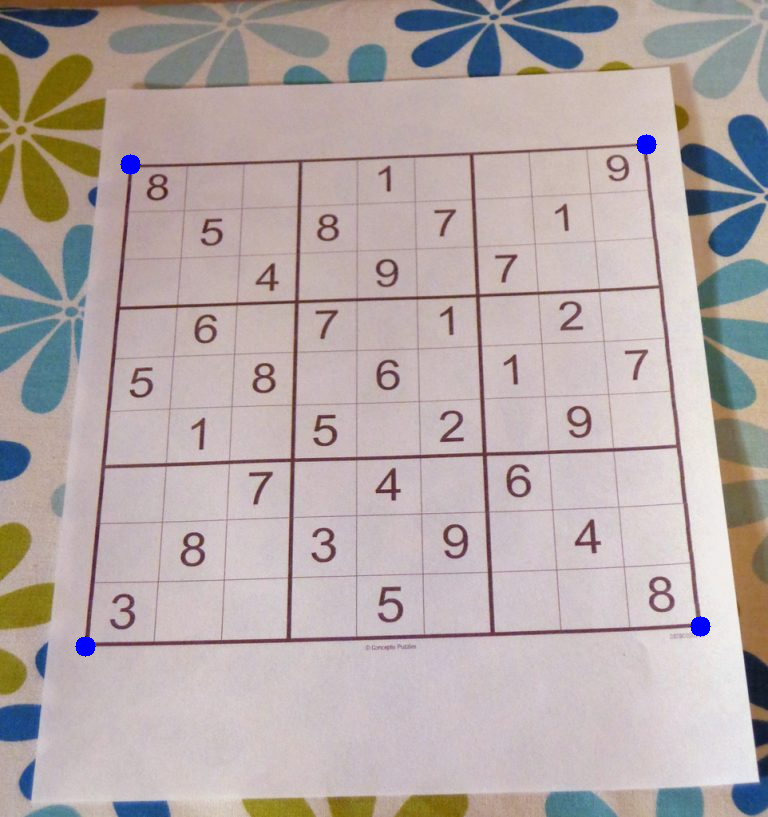

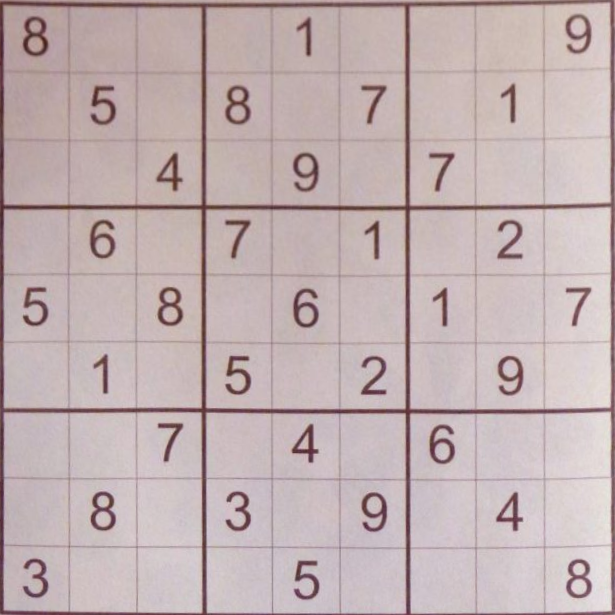

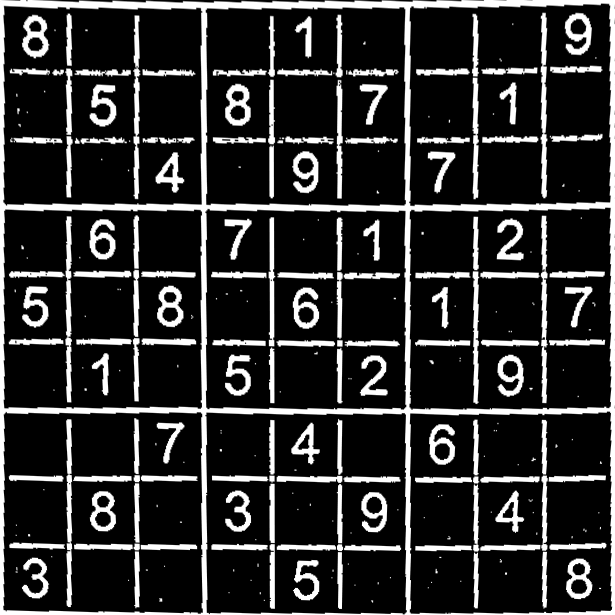

In [10]:
img = image_preproccesor(image)

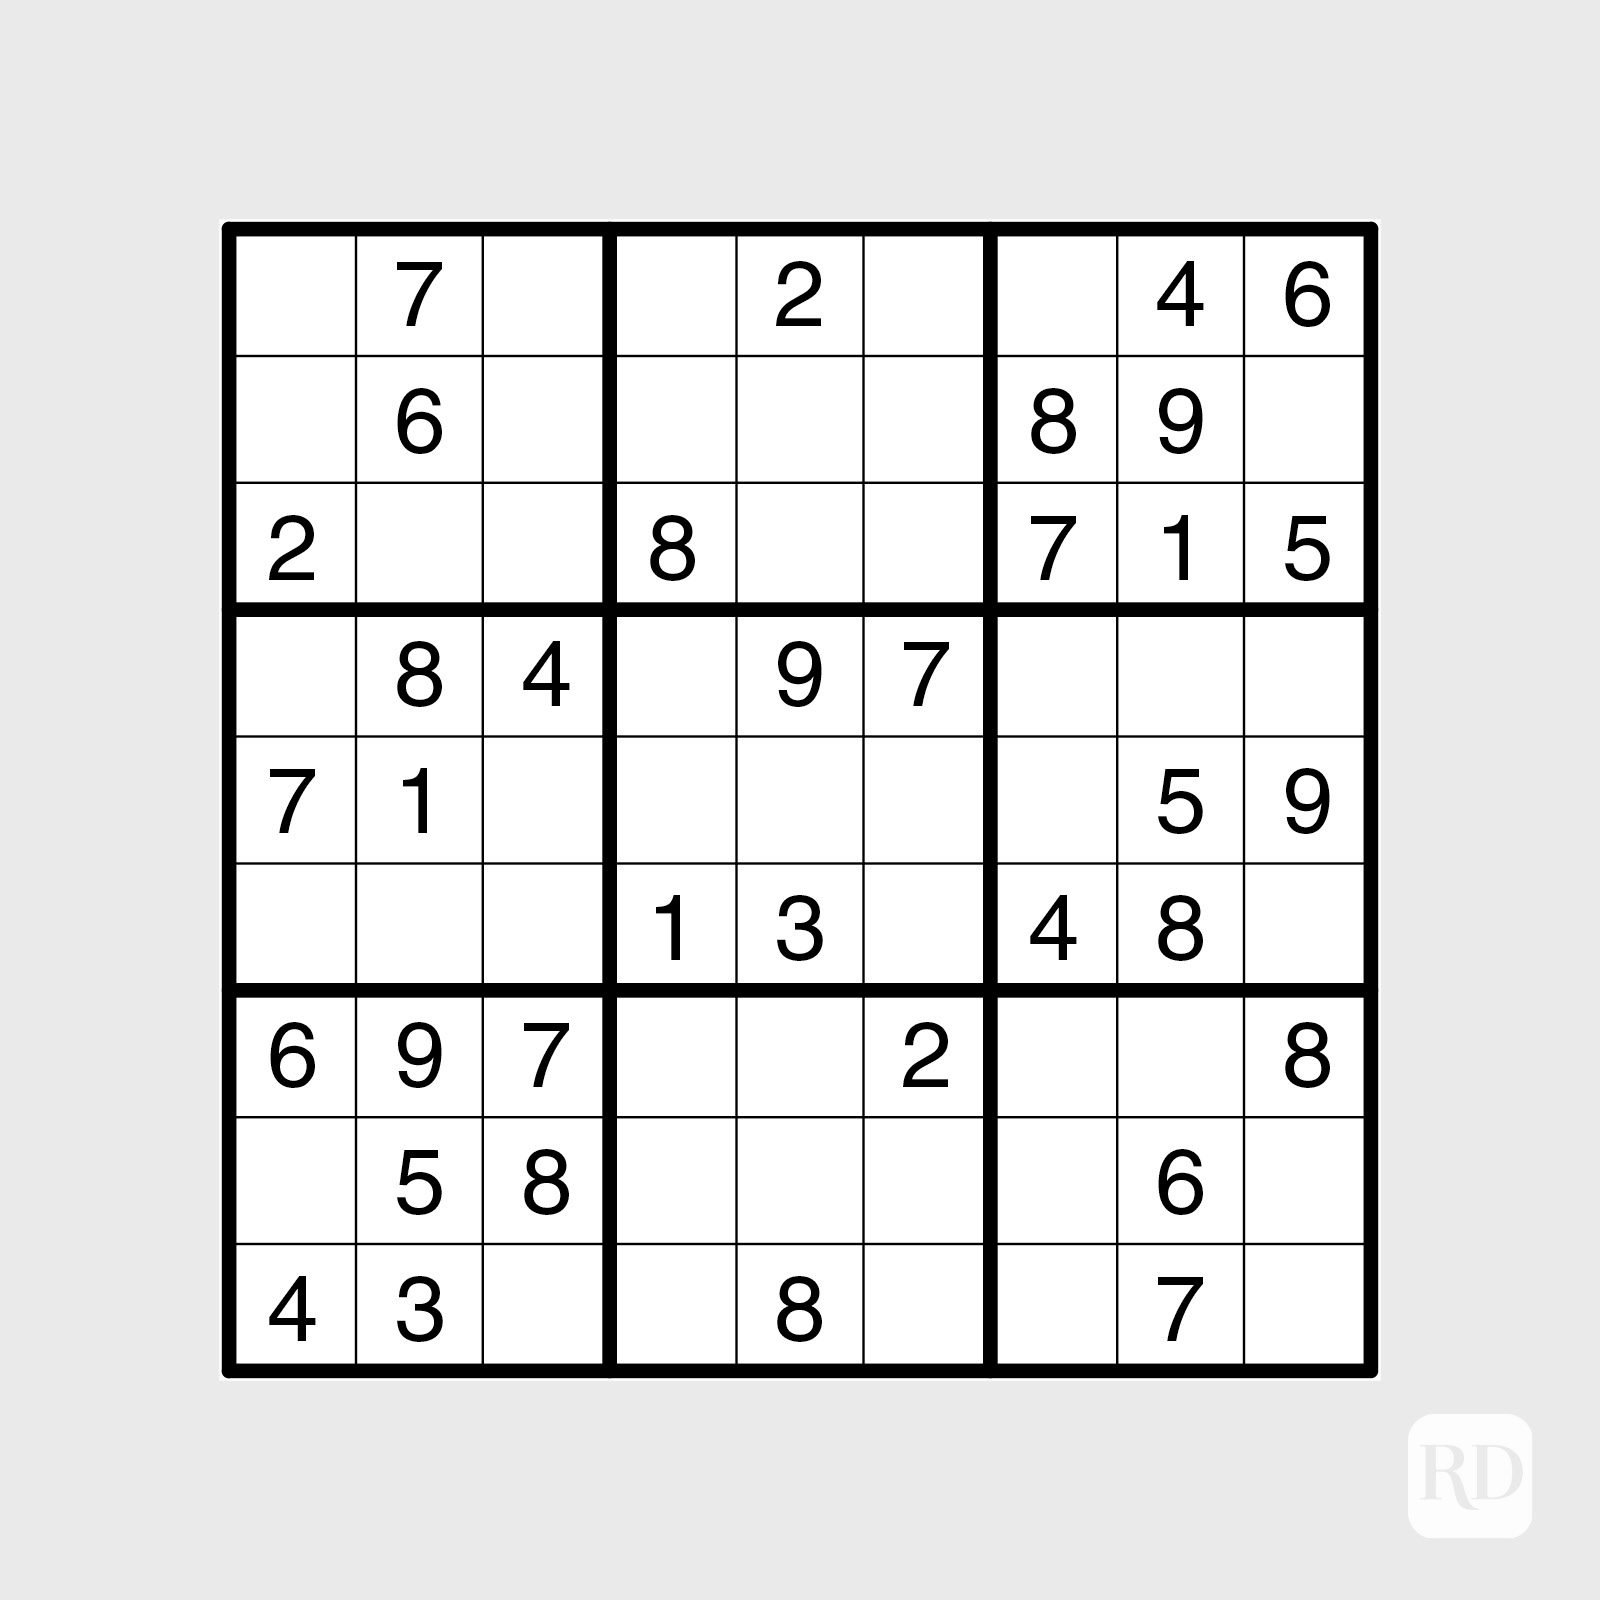

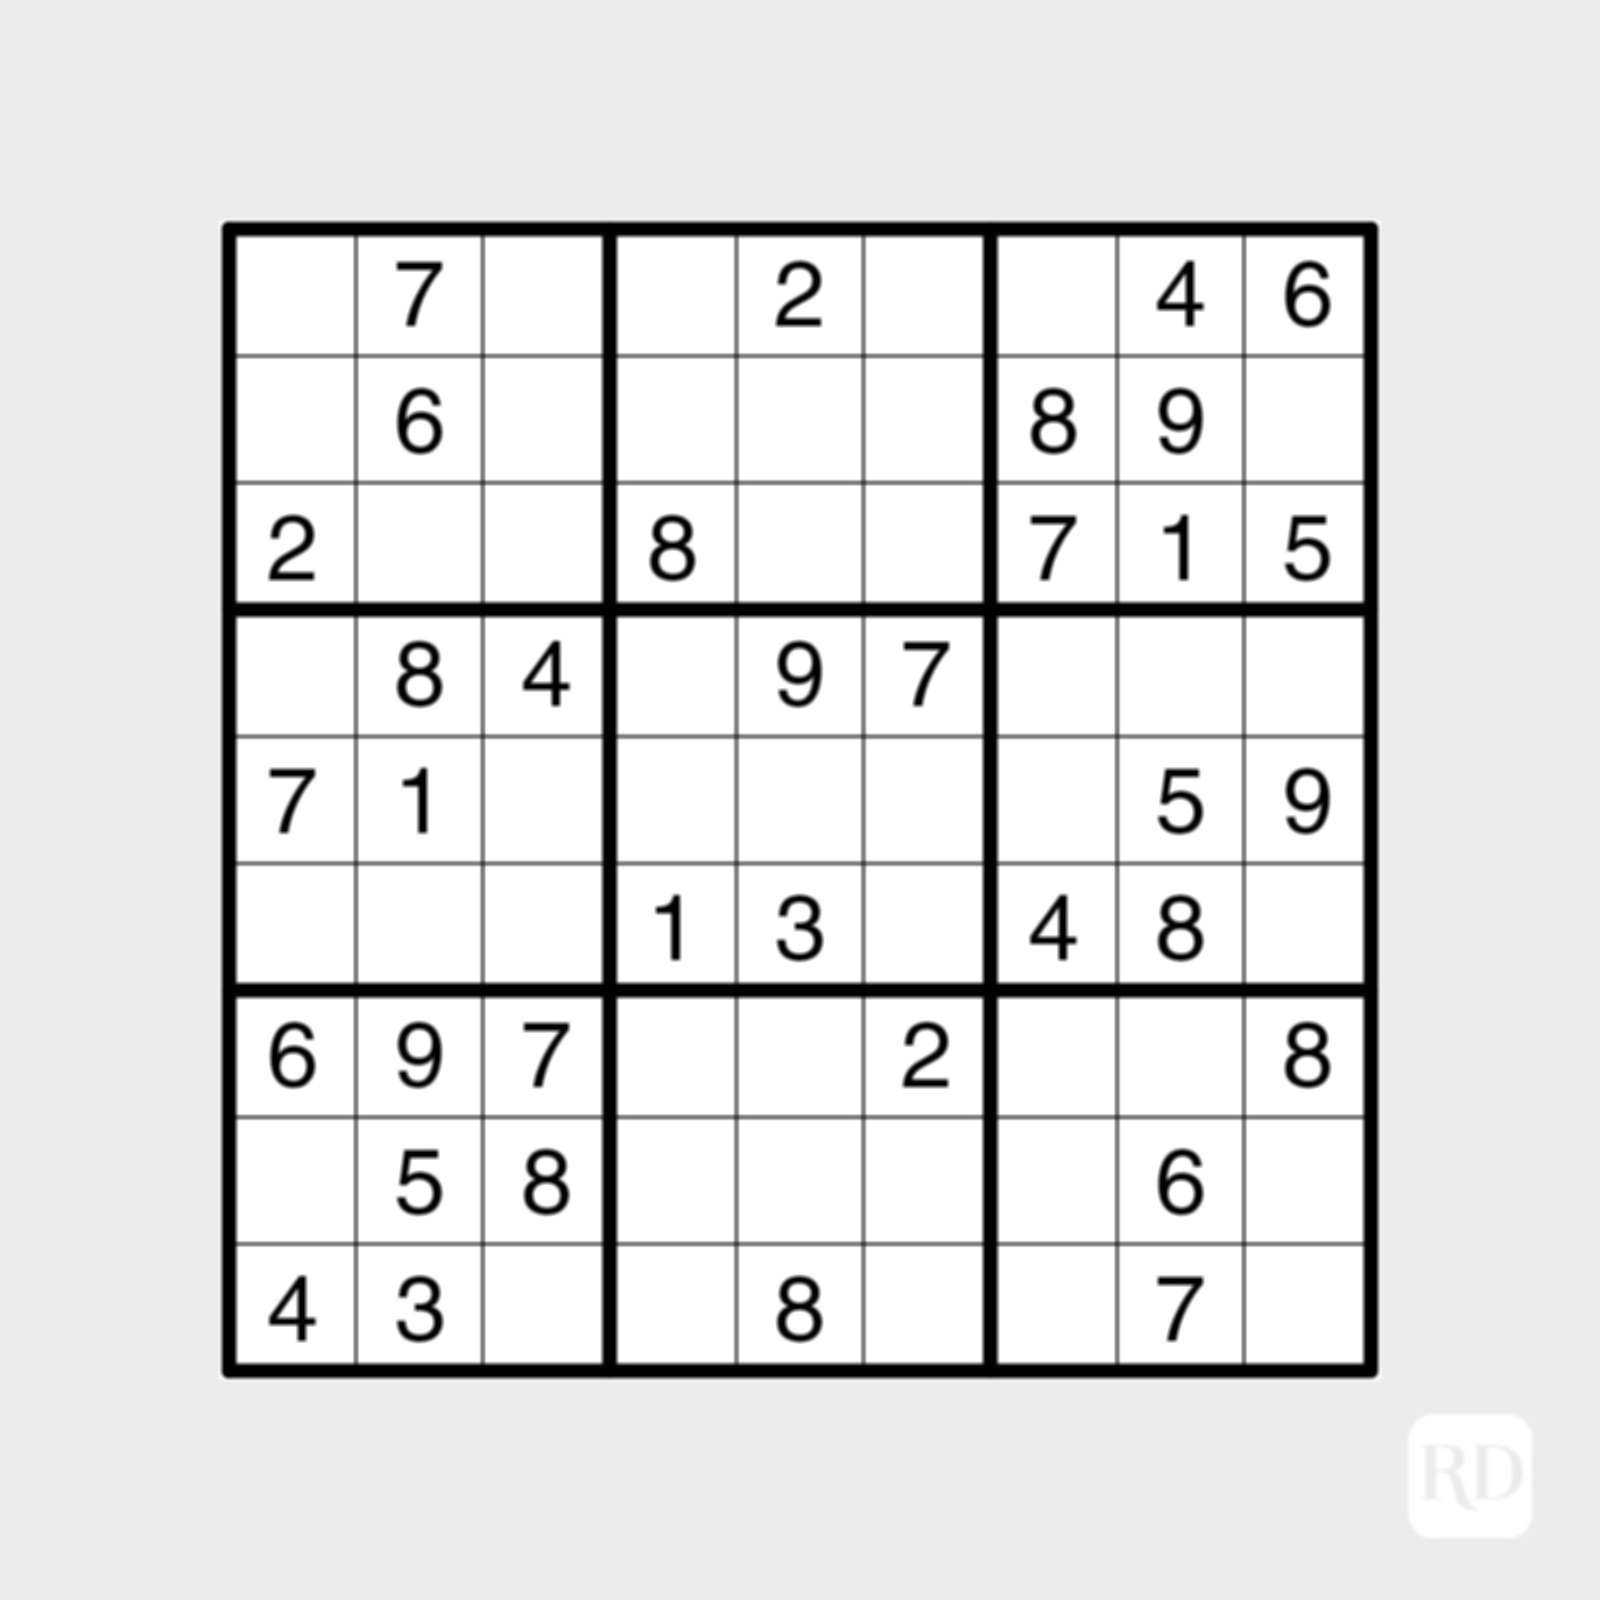

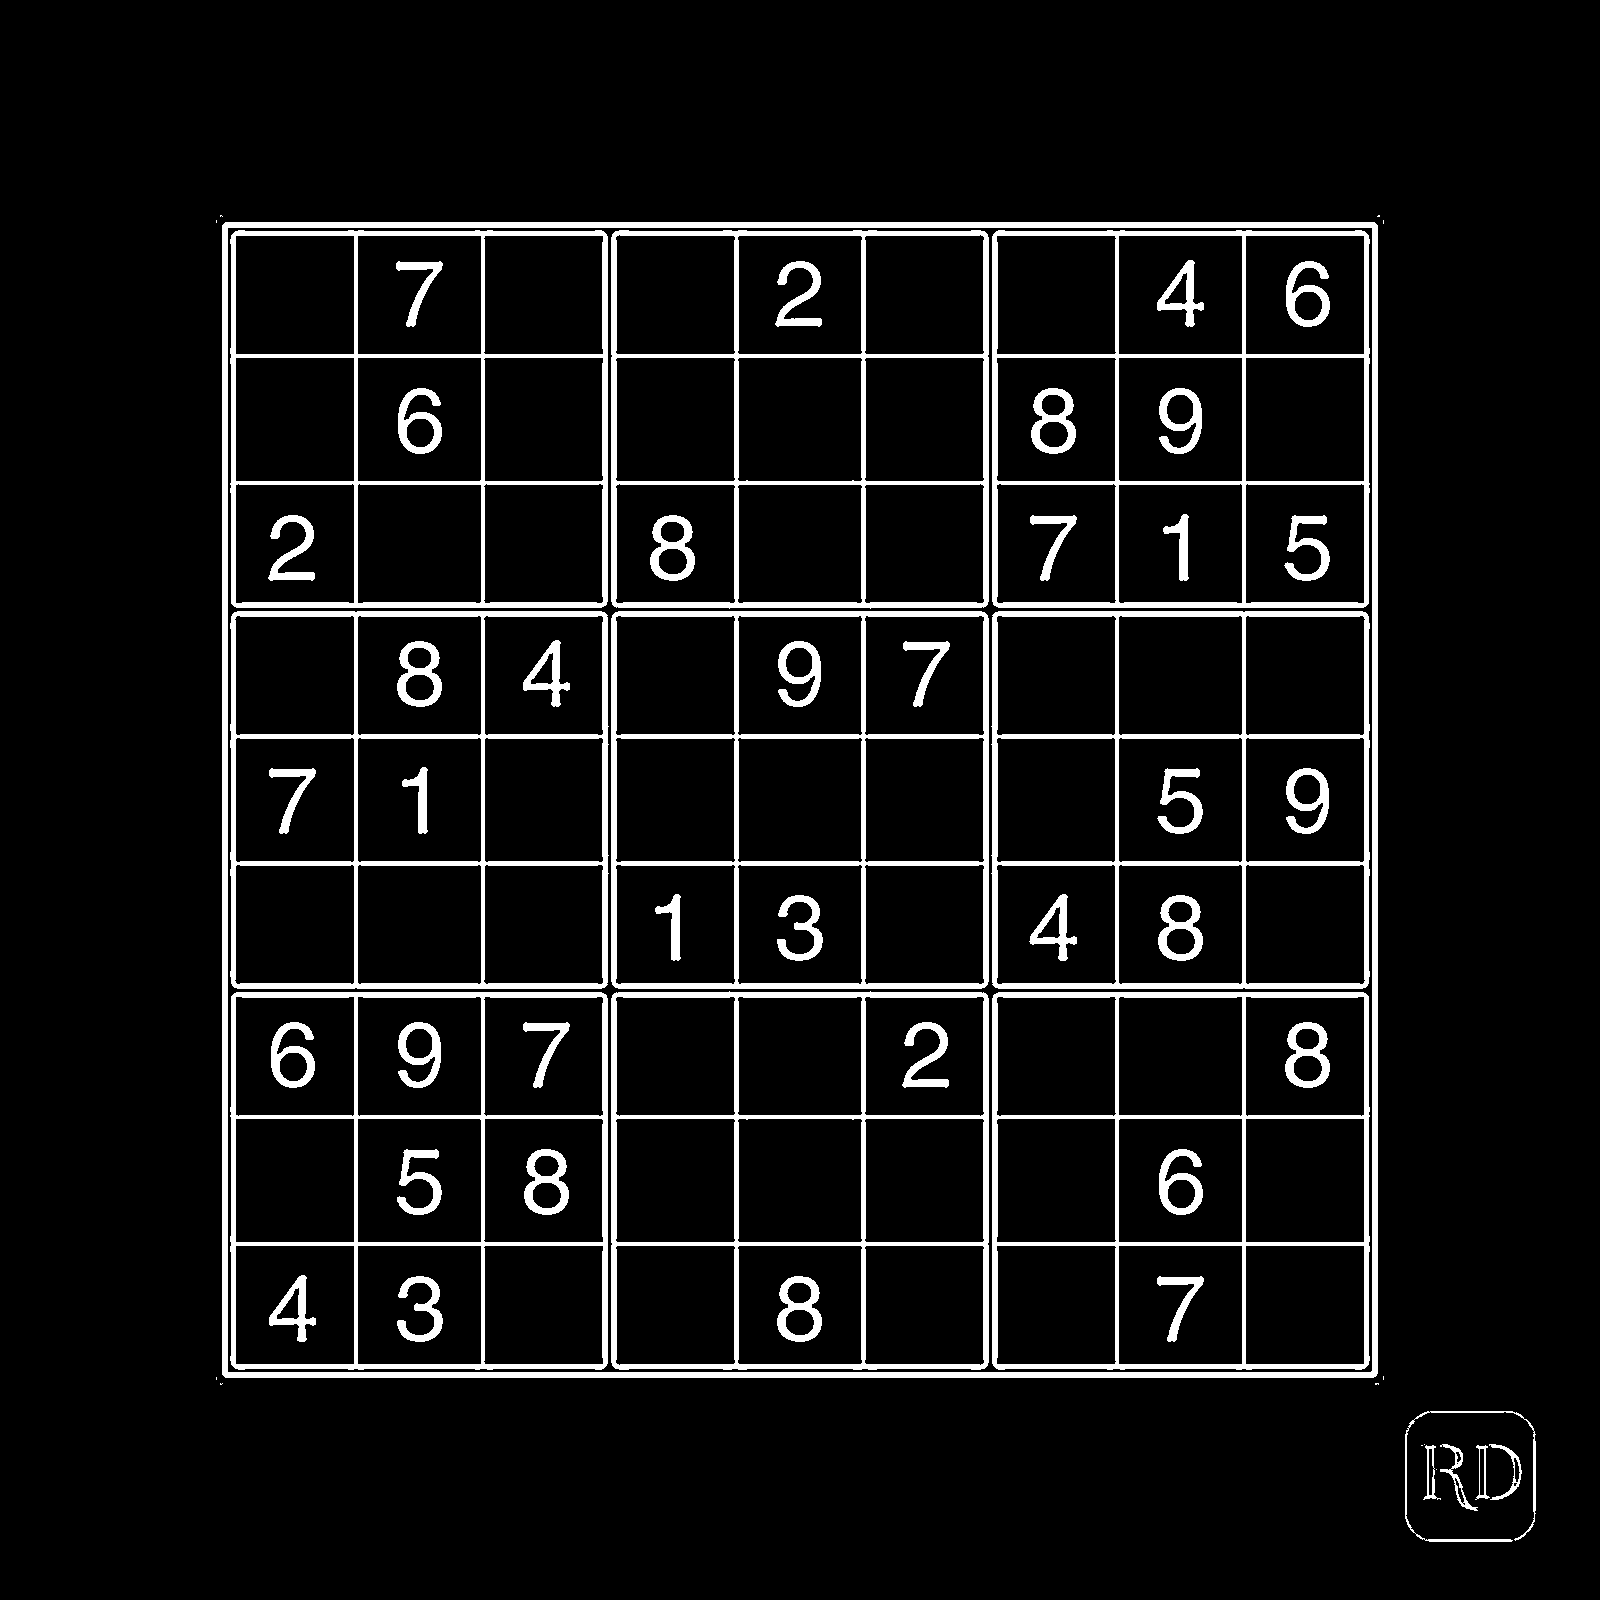

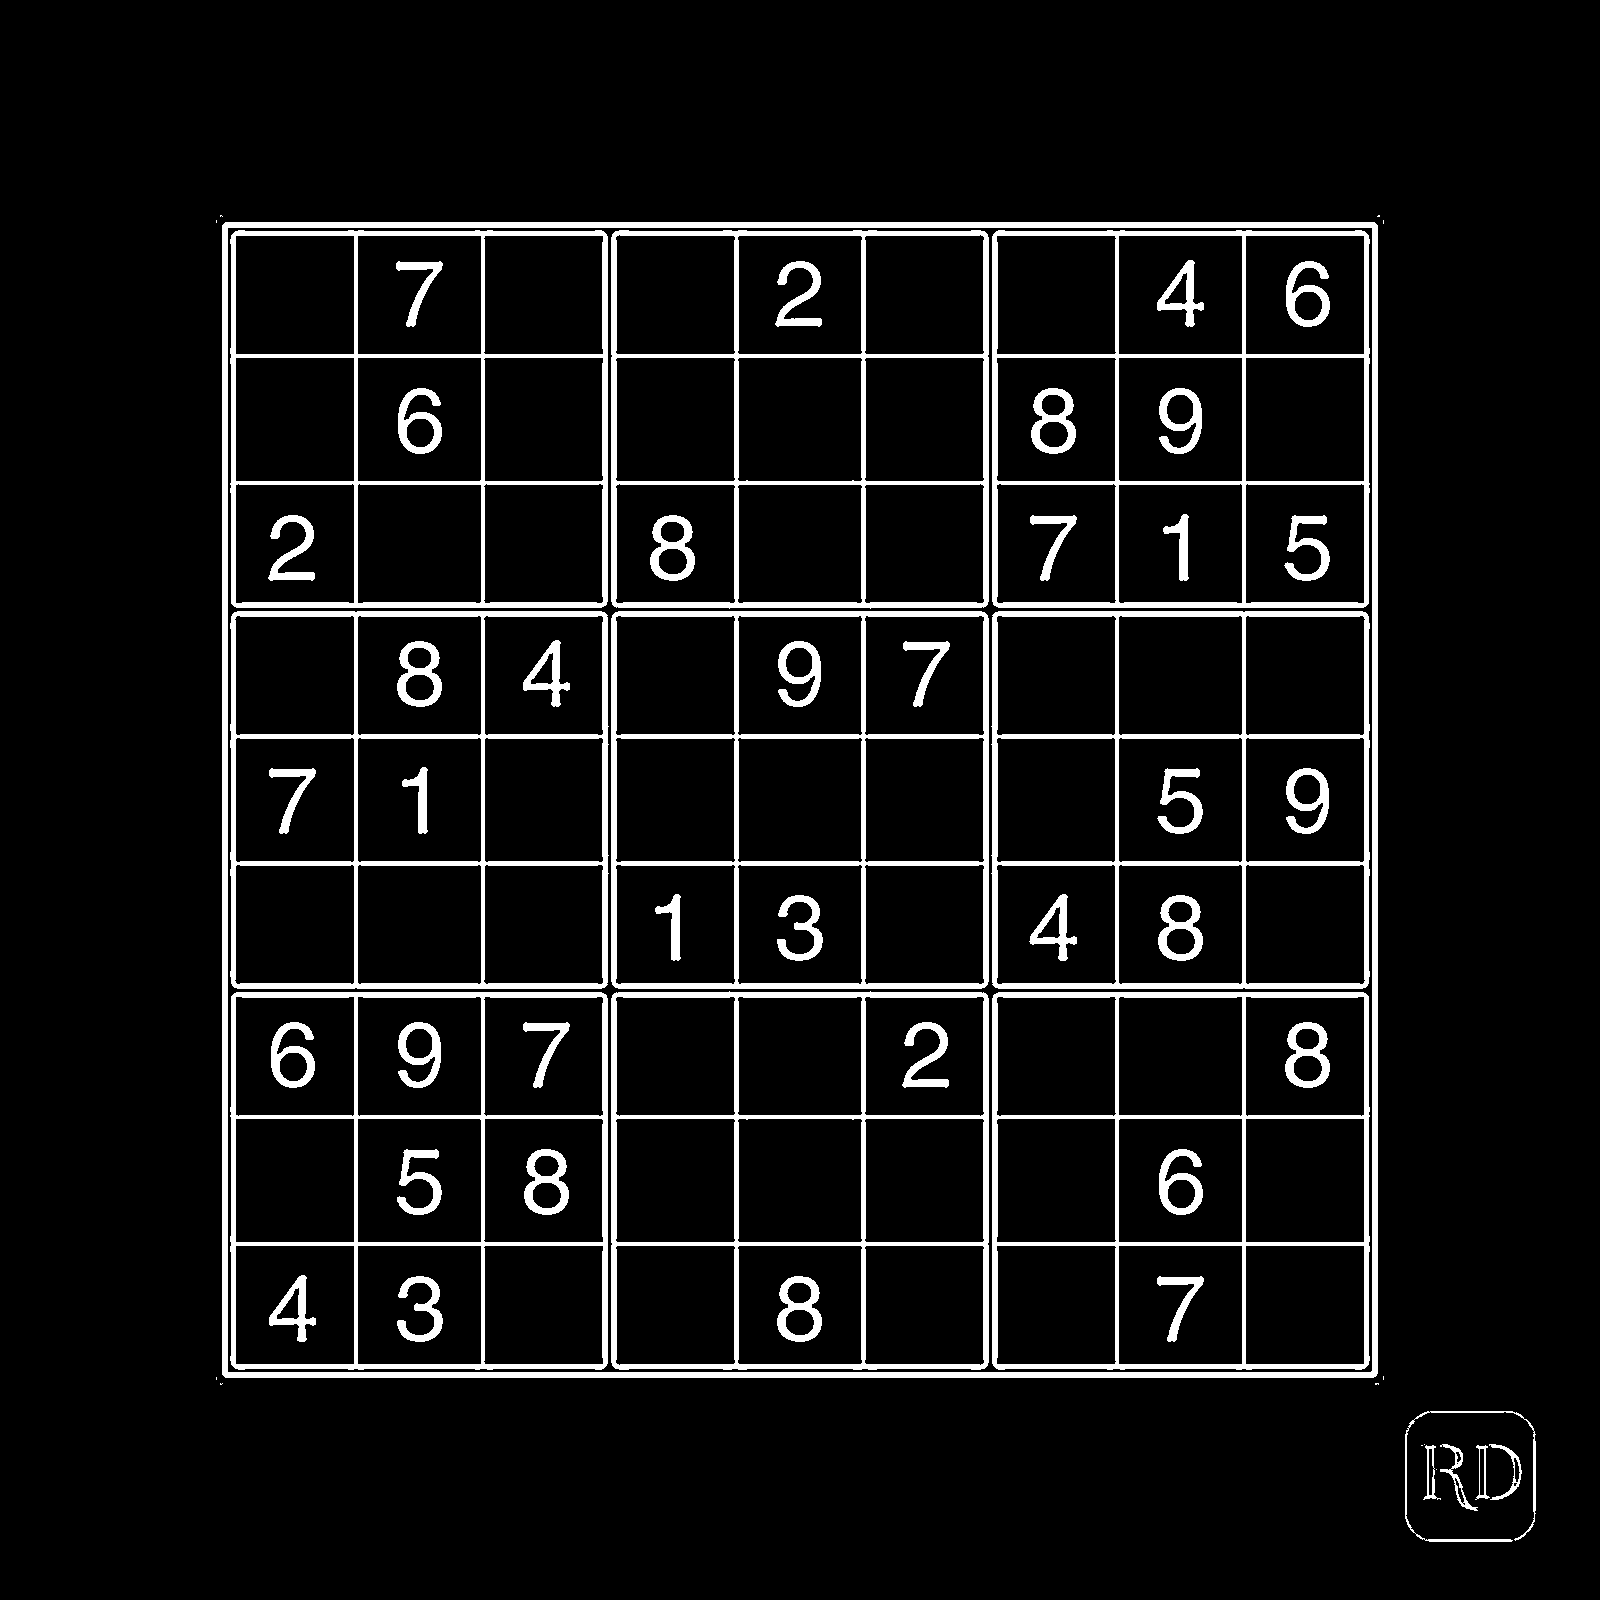

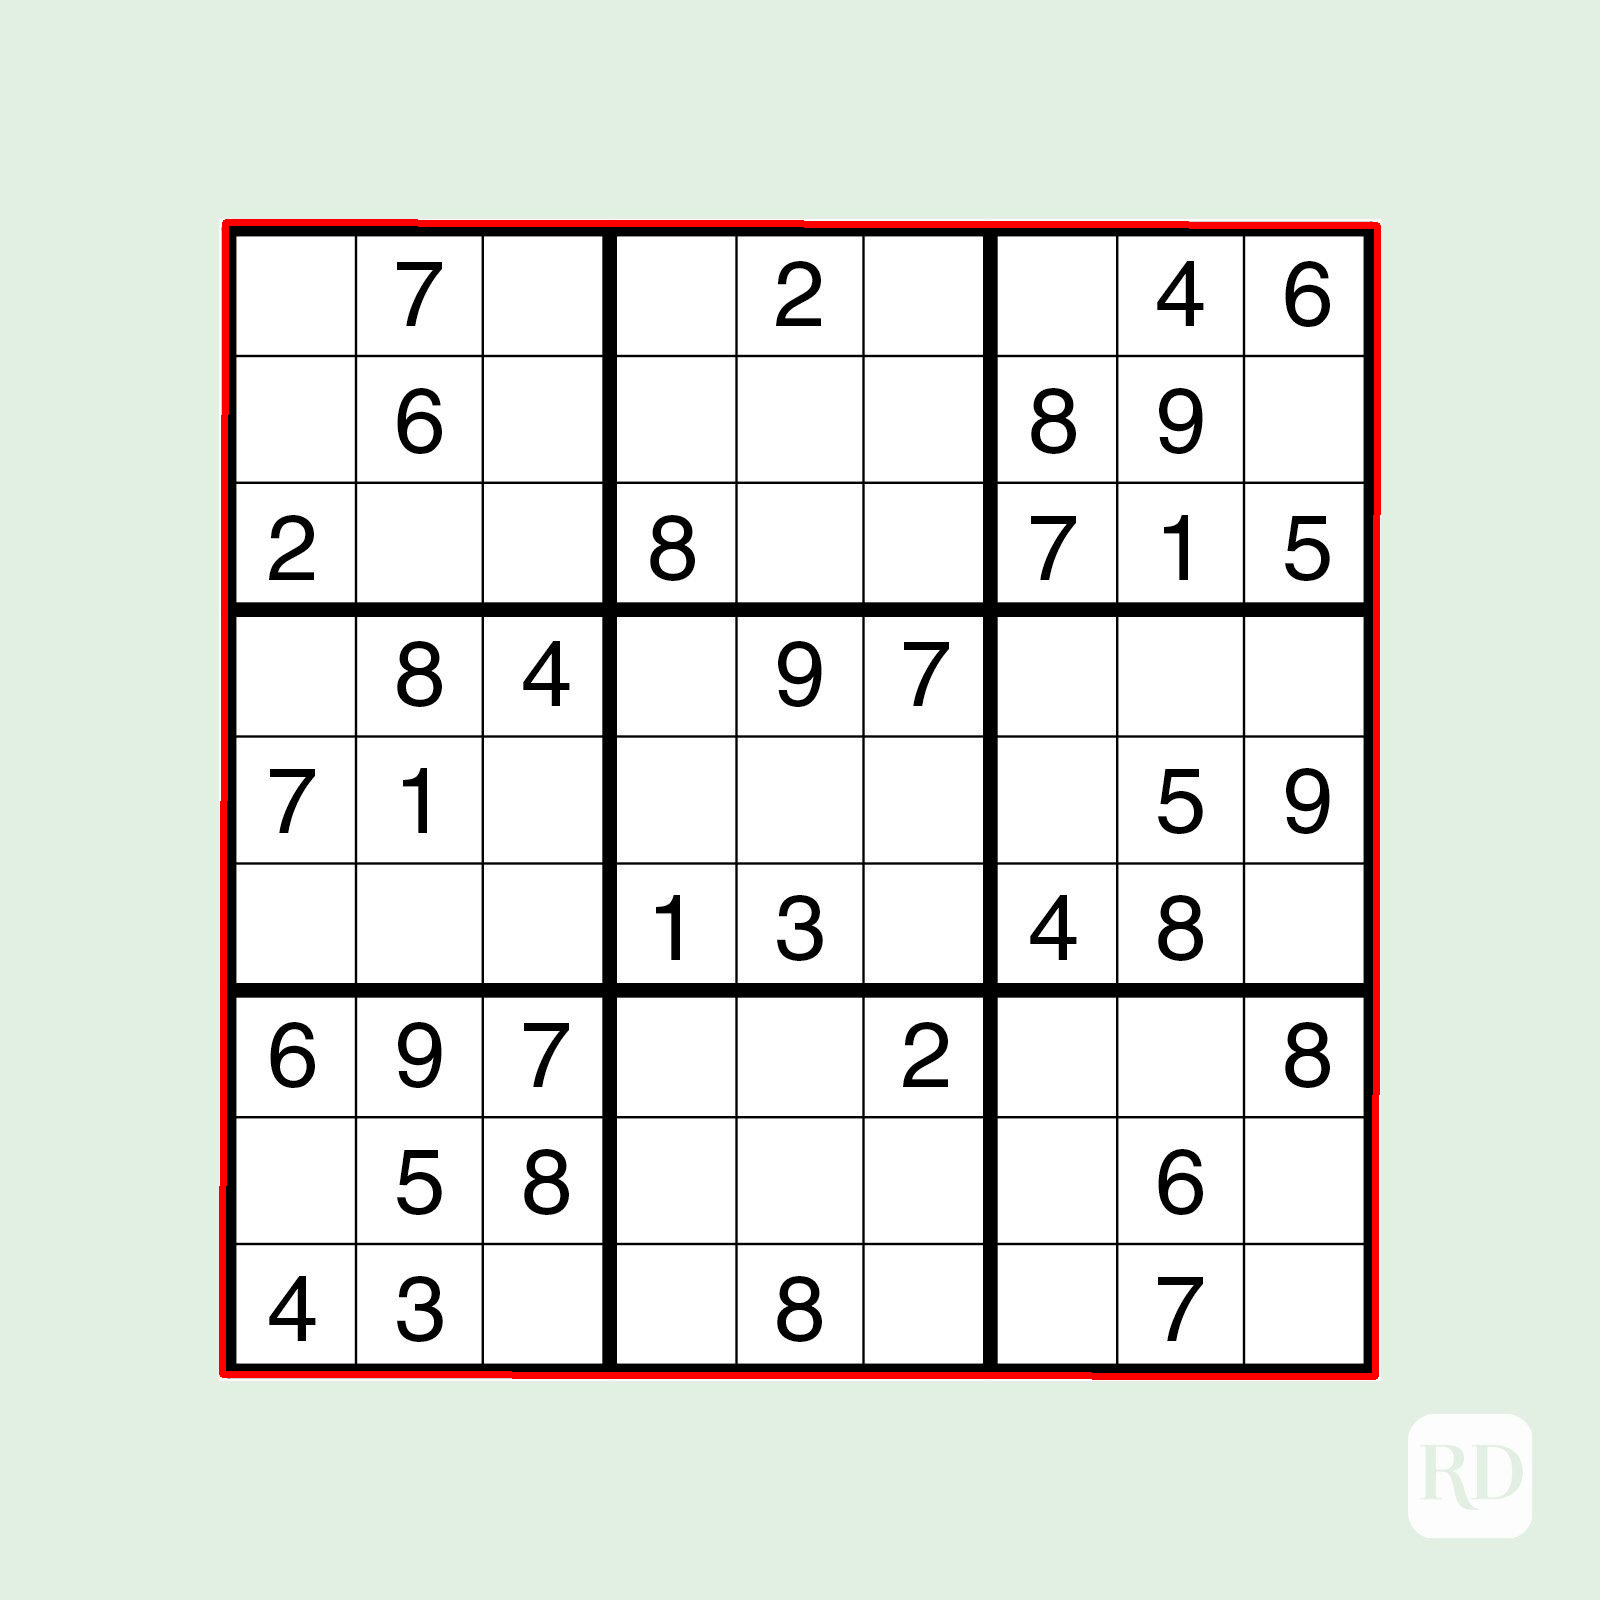

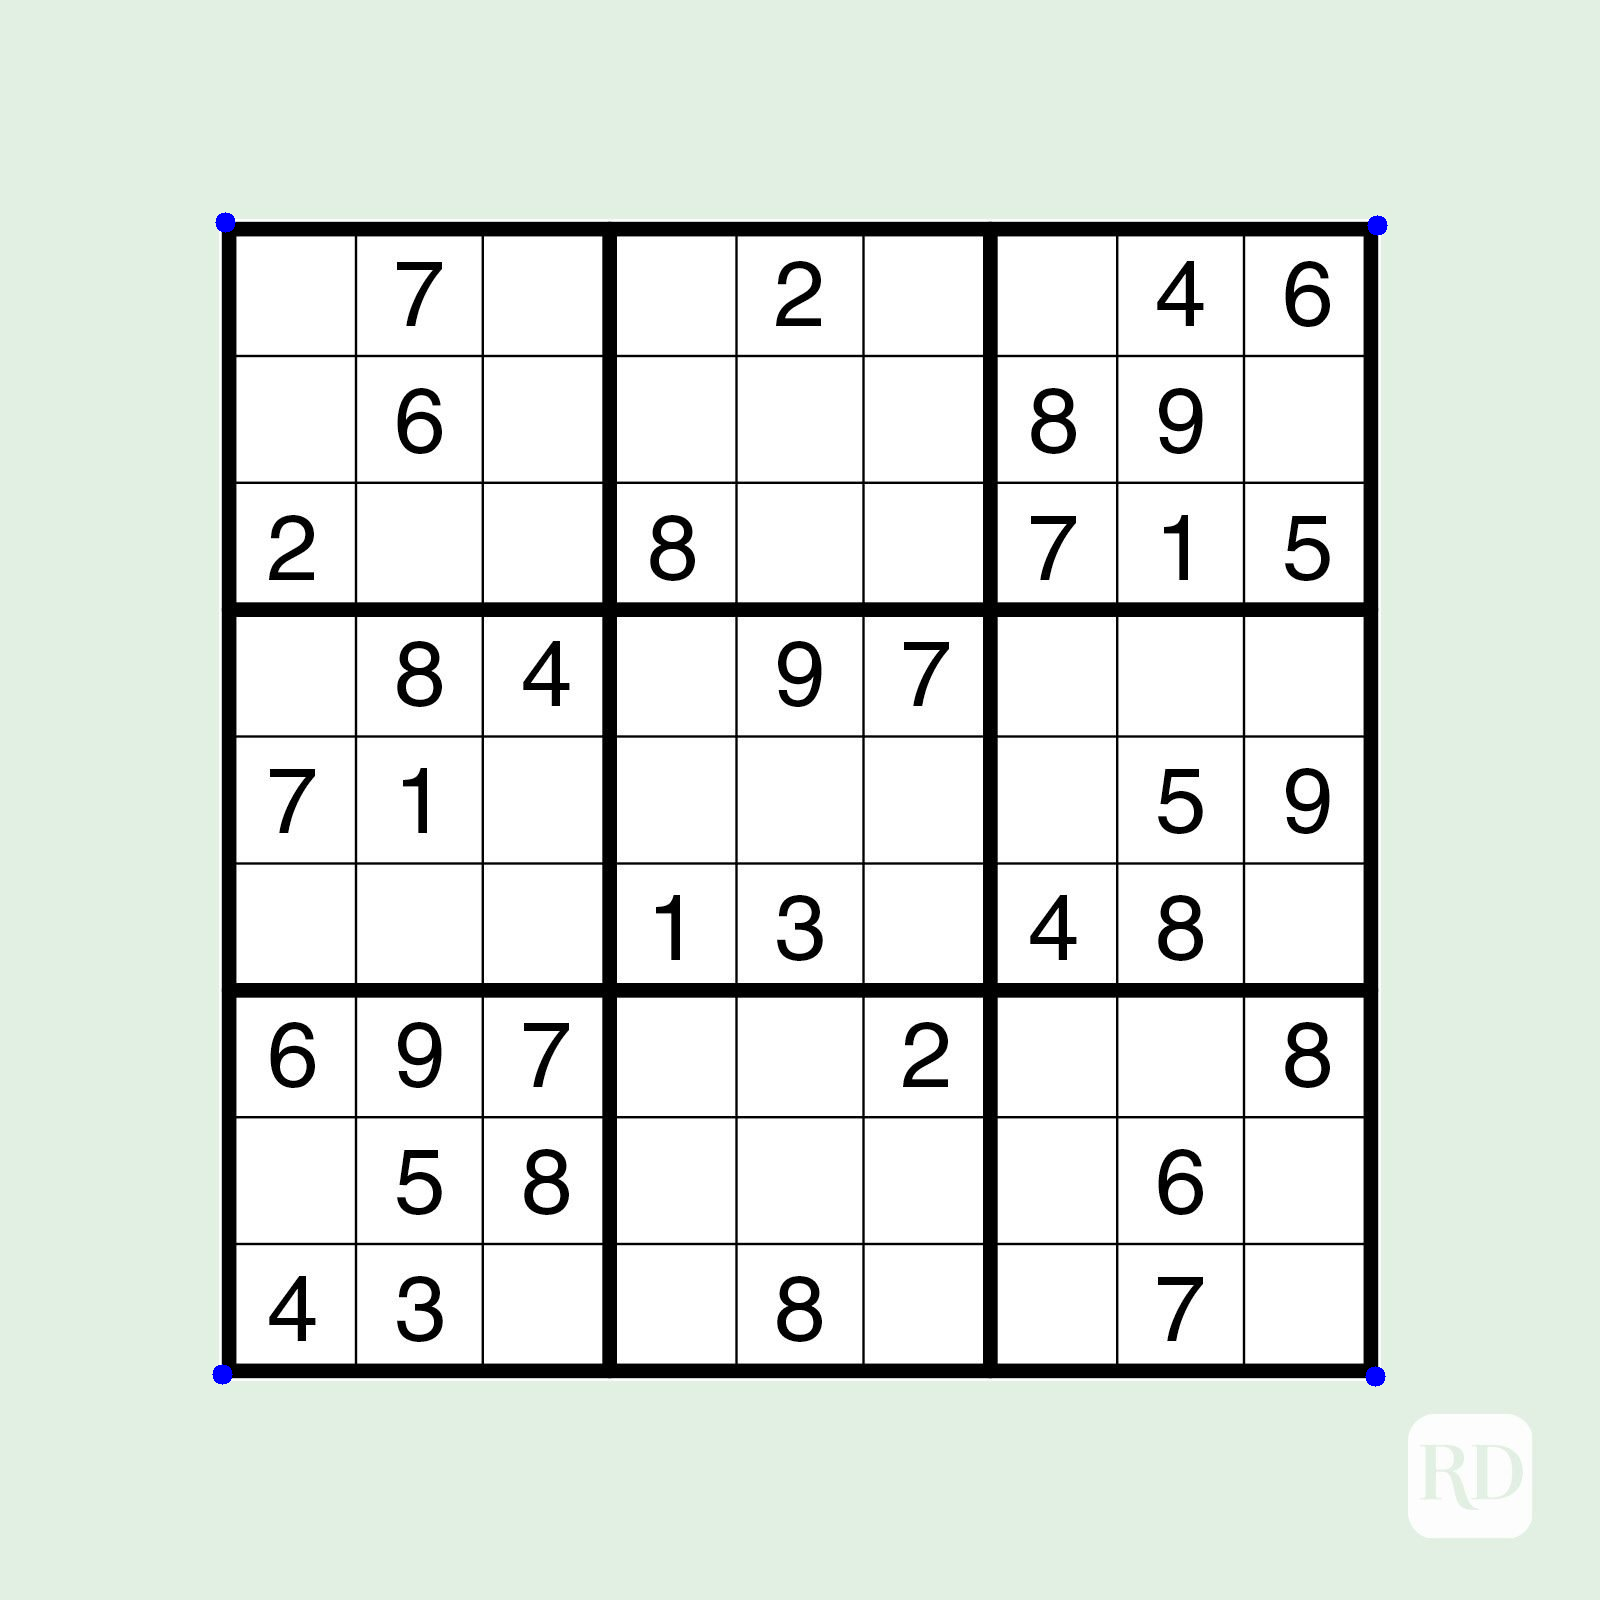

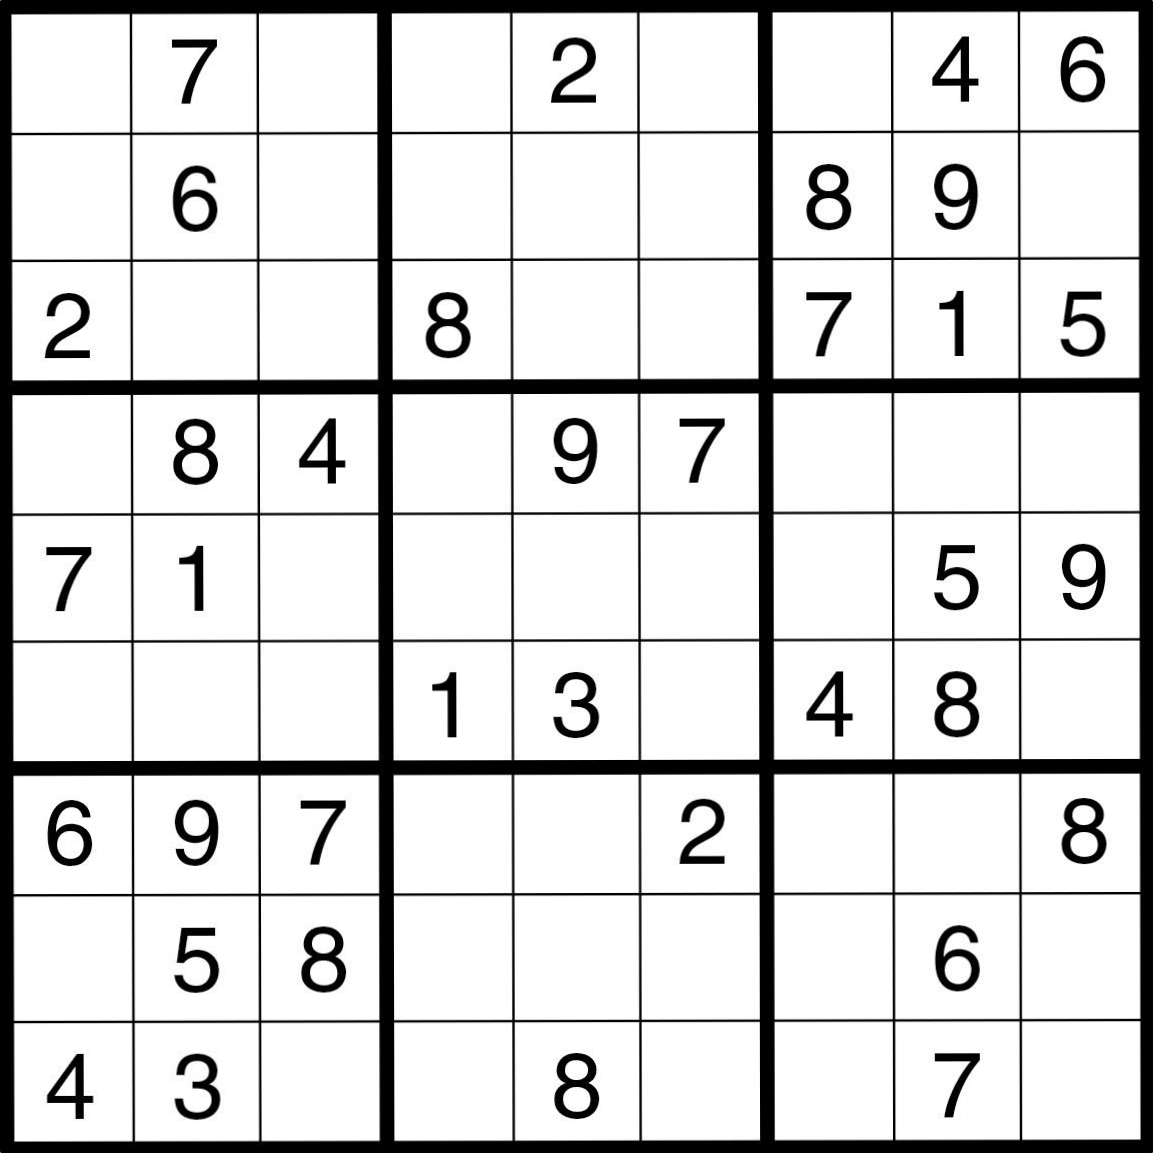

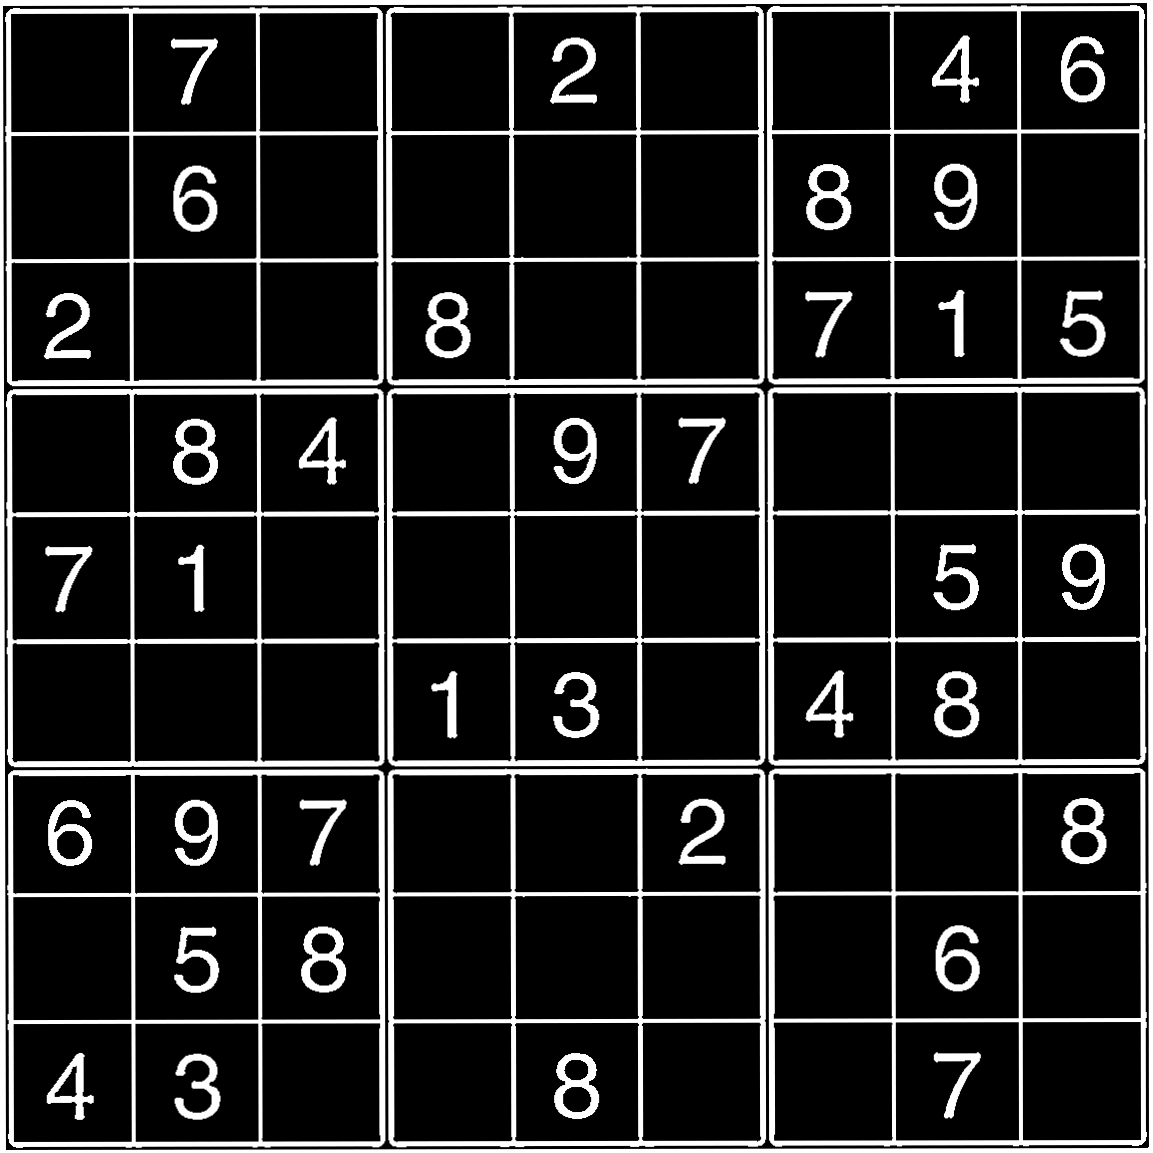

In [11]:
img1 = image_preproccesor(image1)

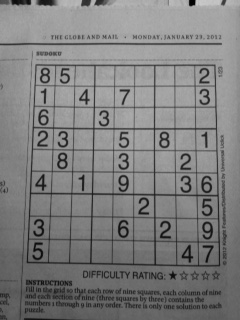

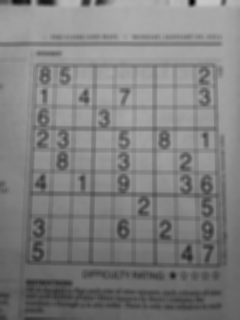

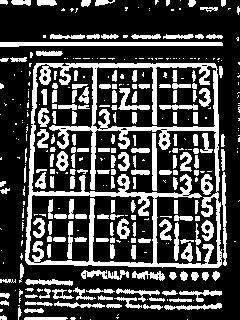

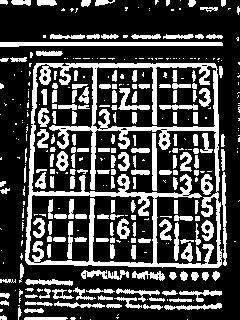

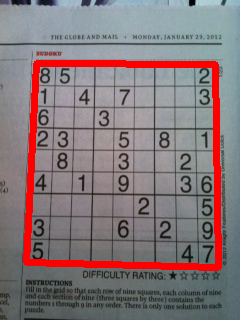

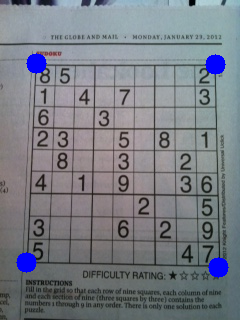

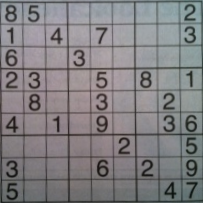

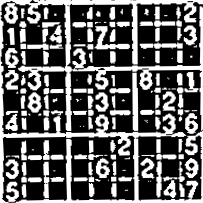

In [12]:
img2 = image_preproccesor(image2)

In [13]:
def digit_reader(image,img_size,grid_size,model,tolerance = 7):
  img = cv2.resize(image,img_size)
  cv2_imshow(img)
  for i in range(grid_size[0]):
    for j in range(grid_size[1]):
      digit = digit_extraction(img,(i,j),img_size,grid_size,extracted_img_size=(28,28),show = True, tolerance = tolerance)
      digit = torch.tensor(digit)
      digit = digit.reshape((1,1,28,28)).float()
      model.eval()
      model = model.to(device = device)
      digit = digit.to(device)
      digit_read = predict(model,digit)
      print(digit_read)
      #return(digit_read)
  
  

      

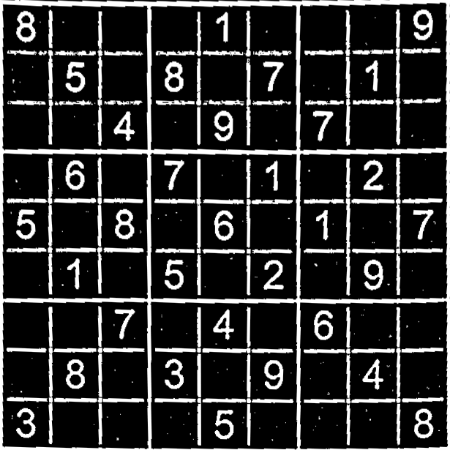

tensor([8], device='cuda:0')


/content/gdrive/MyDrive/Sudoku/Models/sudoku_net.py:41: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


tensor([7], device='cuda:0')


tensor([7], device='cuda:0')


tensor([7], device='cuda:0')


tensor([1], device='cuda:0')


tensor([3], device='cuda:0')


tensor([1], device='cuda:0')


tensor([7], device='cuda:0')


tensor([4], device='cuda:0')


tensor([3], device='cuda:0')


tensor([5], device='cuda:0')


tensor([1], device='cuda:0')


tensor([8], device='cuda:0')


tensor([1], device='cuda:0')


tensor([7], device='cuda:0')


tensor([1], device='cuda:0')


tensor([1], device='cuda:0')


tensor([1], device='cuda:0')


tensor([1], device='cuda:0')


tensor([7], device='cuda:0')


tensor([4], device='cuda:0')


tensor([9], device='cuda:0')


tensor([9], device='cuda:0')


tensor([5], device='cuda:0')


tensor([7], device='cuda:0')


tensor([1], device='cuda:0')


tensor([1], device='cuda:0')


tensor([3], device='cuda:0')


tensor([6], device='cuda:0')


tensor([1], device='cuda:0')


tensor([7], device='cuda:0')


tensor([5], device='cuda:0')


tensor([1], device='cuda:0')


tensor([7], device='cuda:0')


tensor([2], device='cuda:0')


tensor([7], device='cuda:0')


tensor([5], device='cuda:0')


tensor([5], device='cuda:0')


tensor([8], device='cuda:0')


tensor([7], device='cuda:0')


tensor([6], device='cuda:0')


tensor([5], device='cuda:0')


tensor([1], device='cuda:0')


tensor([5], device='cuda:0')


tensor([7], device='cuda:0')


tensor([2], device='cuda:0')


tensor([1], device='cuda:0')


tensor([5], device='cuda:0')


tensor([5], device='cuda:0')


tensor([9], device='cuda:0')


tensor([2], device='cuda:0')


tensor([7], device='cuda:0')


tensor([4], device='cuda:0')


tensor([3], device='cuda:0')


tensor([1], device='cuda:0')


tensor([1], device='cuda:0')


tensor([7], device='cuda:0')


tensor([4], device='cuda:0')


tensor([4], device='cuda:0')


tensor([1], device='cuda:0')


tensor([6], device='cuda:0')


tensor([2], device='cuda:0')


tensor([7], device='cuda:0')


tensor([5], device='cuda:0')


tensor([8], device='cuda:0')


tensor([2], device='cuda:0')


tensor([3], device='cuda:0')


tensor([7], device='cuda:0')


tensor([4], device='cuda:0')


tensor([7], device='cuda:0')


tensor([4], device='cuda:0')


tensor([2], device='cuda:0')


tensor([3], device='cuda:0')


tensor([1], device='cuda:0')


tensor([3], device='cuda:0')


tensor([5], device='cuda:0')


tensor([5], device='cuda:0')


tensor([5], device='cuda:0')


tensor([7], device='cuda:0')


tensor([7], device='cuda:0')


tensor([6], device='cuda:0')


In [14]:
digit_reader(img[1],(450,450),(9,9),model)

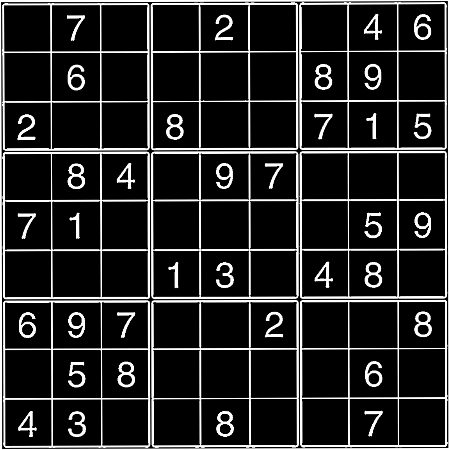

tensor([1], device='cuda:0')


/content/gdrive/MyDrive/Sudoku/Models/sudoku_net.py:41: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


tensor([7], device='cuda:0')


tensor([1], device='cuda:0')


tensor([1], device='cuda:0')


tensor([2], device='cuda:0')


tensor([1], device='cuda:0')


tensor([1], device='cuda:0')


tensor([1], device='cuda:0')


tensor([8], device='cuda:0')


tensor([1], device='cuda:0')


tensor([8], device='cuda:0')


tensor([1], device='cuda:0')


tensor([1], device='cuda:0')


tensor([1], device='cuda:0')


tensor([1], device='cuda:0')


tensor([8], device='cuda:0')


tensor([9], device='cuda:0')


tensor([1], device='cuda:0')


tensor([2], device='cuda:0')


tensor([1], device='cuda:0')


tensor([1], device='cuda:0')


tensor([8], device='cuda:0')


tensor([1], device='cuda:0')


tensor([1], device='cuda:0')


tensor([7], device='cuda:0')


tensor([1], device='cuda:0')


tensor([5], device='cuda:0')


tensor([1], device='cuda:0')


tensor([8], device='cuda:0')


tensor([4], device='cuda:0')


tensor([1], device='cuda:0')


tensor([9], device='cuda:0')


tensor([7], device='cuda:0')


tensor([1], device='cuda:0')


tensor([1], device='cuda:0')


tensor([1], device='cuda:0')


tensor([7], device='cuda:0')


tensor([1], device='cuda:0')


tensor([1], device='cuda:0')


tensor([1], device='cuda:0')


tensor([1], device='cuda:0')


tensor([1], device='cuda:0')


tensor([1], device='cuda:0')


tensor([5], device='cuda:0')


tensor([9], device='cuda:0')


tensor([1], device='cuda:0')


tensor([1], device='cuda:0')


tensor([1], device='cuda:0')


tensor([1], device='cuda:0')


tensor([3], device='cuda:0')


tensor([1], device='cuda:0')


tensor([4], device='cuda:0')


tensor([8], device='cuda:0')


tensor([1], device='cuda:0')


tensor([6], device='cuda:0')


tensor([8], device='cuda:0')


tensor([7], device='cuda:0')


tensor([1], device='cuda:0')


tensor([1], device='cuda:0')


tensor([2], device='cuda:0')


tensor([1], device='cuda:0')


tensor([1], device='cuda:0')


tensor([8], device='cuda:0')


tensor([1], device='cuda:0')


tensor([5], device='cuda:0')


tensor([8], device='cuda:0')


tensor([1], device='cuda:0')


tensor([1], device='cuda:0')


tensor([1], device='cuda:0')


tensor([1], device='cuda:0')


tensor([6], device='cuda:0')


tensor([1], device='cuda:0')


tensor([4], device='cuda:0')


tensor([3], device='cuda:0')


tensor([1], device='cuda:0')


tensor([1], device='cuda:0')


tensor([8], device='cuda:0')


tensor([1], device='cuda:0')


tensor([1], device='cuda:0')


tensor([2], device='cuda:0')


tensor([1], device='cuda:0')


In [15]:
digit_reader(img1[1],(450,450),(9,9),model)

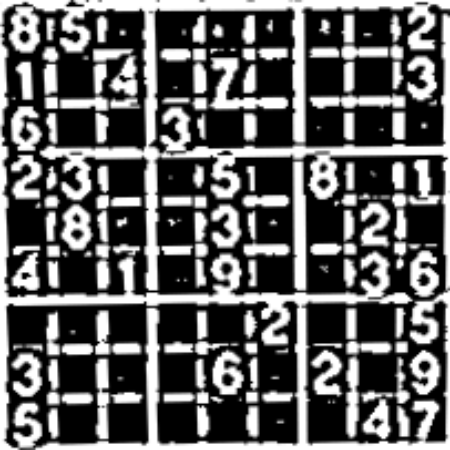

tensor([4], device='cuda:0')


/content/gdrive/MyDrive/Sudoku/Models/sudoku_net.py:41: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


tensor([5], device='cuda:0')


tensor([5], device='cuda:0')


tensor([7], device='cuda:0')


tensor([7], device='cuda:0')


tensor([7], device='cuda:0')


tensor([9], device='cuda:0')


tensor([3], device='cuda:0')


tensor([2], device='cuda:0')


tensor([8], device='cuda:0')


tensor([7], device='cuda:0')


tensor([3], device='cuda:0')


tensor([7], device='cuda:0')


tensor([7], device='cuda:0')


tensor([7], device='cuda:0')


tensor([7], device='cuda:0')


tensor([7], device='cuda:0')


tensor([3], device='cuda:0')


tensor([6], device='cuda:0')


tensor([7], device='cuda:0')


tensor([7], device='cuda:0')


tensor([2], device='cuda:0')


tensor([7], device='cuda:0')


tensor([7], device='cuda:0')


tensor([7], device='cuda:0')


tensor([2], device='cuda:0')


tensor([3], device='cuda:0')


tensor([2], device='cuda:0')


tensor([2], device='cuda:0')


tensor([7], device='cuda:0')


tensor([7], device='cuda:0')


tensor([5], device='cuda:0')


tensor([7], device='cuda:0')


tensor([4], device='cuda:0')


tensor([9], device='cuda:0')


tensor([1], device='cuda:0')


tensor([7], device='cuda:0')


tensor([4], device='cuda:0')


tensor([7], device='cuda:0')


tensor([7], device='cuda:0')


tensor([3], device='cuda:0')


tensor([7], device='cuda:0')


tensor([2], device='cuda:0')


tensor([2], device='cuda:0')


tensor([0], device='cuda:0')


tensor([0], device='cuda:0')


tensor([0], device='cuda:0')


tensor([1], device='cuda:0')


tensor([2], device='cuda:0')


tensor([4], device='cuda:0')


tensor([2], device='cuda:0')


tensor([7], device='cuda:0')


tensor([3], device='cuda:0')


tensor([6], device='cuda:0')


tensor([7], device='cuda:0')


tensor([6], device='cuda:0')


tensor([0], device='cuda:0')


tensor([6], device='cuda:0')


tensor([0], device='cuda:0')


tensor([2], device='cuda:0')


tensor([0], device='cuda:0')


tensor([2], device='cuda:0')


tensor([5], device='cuda:0')


tensor([3], device='cuda:0')


tensor([0], device='cuda:0')


tensor([2], device='cuda:0')


tensor([0], device='cuda:0')


tensor([6], device='cuda:0')


tensor([2], device='cuda:0')


tensor([2], device='cuda:0')


tensor([6], device='cuda:0')


tensor([4], device='cuda:0')


tensor([5], device='cuda:0')


tensor([0], device='cuda:0')


tensor([0], device='cuda:0')


tensor([0], device='cuda:0')


tensor([0], device='cuda:0')


tensor([5], device='cuda:0')


tensor([2], device='cuda:0')


tensor([0], device='cuda:0')


tensor([1], device='cuda:0')


In [16]:
digit_reader(img2[1],(450,450),(9,9),model)